In [1]:
import os
import tempfile
import urllib

import pandas as pd

from cell_type_naming import nice_to_weirds, weird_to_nice

In [2]:
truth = pd.read_csv(
    "gs://liulab/csx_example_files/groundtruth_Melanoma_Tirosh_et_al_SuppFig3b-d.txt",
    sep="\t",
    index_col=0,
).rename_axis(index="mixture_id").rename(columns=weird_to_nice)

truth

,Malignant,Endothelial,CAF,T CD8,NK,Macrophage,T CD4,B
mixture_id,,,,,,,,
53,0.1280,0.0880,0.0320,0.2000,0.0800,0.0960,0.3760,0.0000
58,0.0000,0.0000,0.0000,0.6508,0.0317,0.0159,0.2857,0.0159
59,0.8710,0.0000,0.1129,0.0000,0.0000,0.0161,0.0000,0.0000
60,0.0448,0.0000,0.0000,0.1940,0.0498,0.0199,0.2139,0.4776
65,0.0755,0.0000,0.0000,0.4717,0.0000,0.0189,0.3396,0.0943
67,0.0000,0.0000,0.0000,0.3059,0.0118,0.0000,0.4588,0.2235
71,0.6835,0.0000,0.0000,0.1899,0.0000,0.0253,0.1013,0.0000
72,0.0000,0.0000,0.0000,0.1634,0.0065,0.0000,0.6013,0.2288
74,0.0000,0.0000,0.0000,0.6496,0.0073,0.0365,0.2117,0.0949


In [15]:
experiments_root = "liulab/csx_experiments/varying_parameters"

!tree -h -L 1 {os.path.join("/mnt/buckets", experiments_root)}
!tree -h -L 1 {os.path.join("/mnt/buckets", experiments_root, "defaults,single_cell_true")}

/mnt/buckets/liulab/csx_experiments/varying_parameters
├── [   0]  defaults
├── [   0]  refsample_from_defaults
├── [   0]  refsample_from_defaults,single_cell_true
├── [   0]  refsample_from_defaults,with_bmode
├── [   0]  refsample_from_webjob4
├── [   0]  refsample_from_webjob4,with_bmode
├── [   0]  sigmat_from_defaults
├── [   0]  sigmat_from_defaults,with_bmode
├── [   0]  sigmat_from_webjob4
├── [   0]  sigmat_from_webjob4,with_bmode
└── [   0]  with_bmode

11 directories, 0 files
/mnt/buckets/liulab/csx_experiments/varying_parameters/defaults,single_cell_true [error opening dir]

0 directories, 0 files


In [4]:
experiments = os.listdir(os.path.join("/mnt/buckets", experiments_root))
experiments

['defaults',
 'refsample_from_defaults',
 'refsample_from_defaults,single_cell_true',
 'refsample_from_defaults,with_bmode',
 'refsample_from_webjob4',
 'refsample_from_webjob4,with_bmode',
 'sigmat_from_defaults',
 'sigmat_from_defaults,with_bmode',
 'sigmat_from_webjob4',
 'sigmat_from_webjob4,with_bmode',
 'with_bmode']

In [5]:
def load_csx_results(experiment_uri):
    try:
        uri = os.path.join(experiment_uri, "CIBERSORTx_Results.txt")
        df = pd.read_csv(uri, sep="\t", index_col=0)
    except:
        uri = os.path.join(experiment_uri, "CIBERSORTx_Adjusted.txt")
        df = pd.read_csv(uri, sep="\t", index_col=0)
    df = df.iloc[:, :-3]  # ignore last three columns, which are test statistics
    df.rename(
        columns=weird_to_nice,
#         index=lambda old: int(old.split(".")[-1]),
        inplace=True)
    df.rename_axis(
        columns="cell_type",
        index="mixture_id",
        inplace=True)
    return df

In [6]:
preds = dict()
# preds["derek"] = results_derek
# preds["me"] = results_docker
for experiment in experiments:
    try:
        experiment_uri = os.path.join("gs://", experiments_root, experiment)
        preds[experiment] = load_csx_results(experiment_uri)
    except FileNotFoundError:
        print("no results for", experiment, experiment_uri)

df_preds = pd.concat(
    preds,
    names=["experiment"]
)

df_preds

cell_type              Malignant   Endothelial       CAF     T CD8        NK  \
experiment mixture_id                                                          
defaults   53           0.046178  2.726053e-02  0.058420  0.286861  0.164019   
           58           0.000000  0.000000e+00  0.002111  0.697889  0.061412   
           59           0.617075  9.779191e-07  0.358669  0.000000  0.000240   
           60           0.021843  1.732089e-04  0.000000  0.228676  0.084564   
           65           0.059540  0.000000e+00  0.000411  0.309446  0.028671   
...                          ...           ...       ...       ...       ...   
with_bmode 82           0.322642  9.459352e-03  0.078214  0.173296  0.043014   
           84           0.083804  2.351226e-03  0.013043  0.208151  0.076386   
           88           0.372916  0.000000e+00  0.009179  0.148055  0.039789   
           89           0.191563  4.617006e-04  0.001795  0.331568  0.015323   
           94           0.052642  7.466159e-02  0.054631  0.003151  0.017730   

cell_type              Macrophage     T CD4         B  
experiment mixture_id                                  
defaults   53            0.084984  0.332278  0.000000  
           58            0.014088  0.214017  0.010482  
           59            0.023462  0.000553  0.000000  
           60            0.049654  0.179896  0.435194  
           65            0.027971  0.485839  0.088122  
...                           ...       ...       ...  
with_bmode 82            0.057151  0.271576  0.044647  
           84            0.129138  0.359484  0.127643  
           88            0.132483  0.215085  0.082493  
           89            0.071638  0.174191  0.213461  
           94            0.037556  0.468256  0.291373  

[209 rows x 8 columns]

In [7]:
truth = pd.read_csv(
    "gs://liulab/csx_example_files/groundtruth_Melanoma_Tirosh_et_al_SuppFig3b-d.txt",
    sep="\t",
    index_col=0
)
truth.rename_axis(columns="cell_type", index="mixture_id", inplace=True)
truth.rename(columns=weird_to_nice, inplace=True)
truth

cell_type,Malignant,Endothelial,CAF,T CD8,NK,Macrophage,T CD4,B
mixture_id,,,,,,,,
53,0.1280,0.0880,0.0320,0.2000,0.0800,0.0960,0.3760,0.0000
58,0.0000,0.0000,0.0000,0.6508,0.0317,0.0159,0.2857,0.0159
59,0.8710,0.0000,0.1129,0.0000,0.0000,0.0161,0.0000,0.0000
60,0.0448,0.0000,0.0000,0.1940,0.0498,0.0199,0.2139,0.4776
65,0.0755,0.0000,0.0000,0.4717,0.0000,0.0189,0.3396,0.0943
67,0.0000,0.0000,0.0000,0.3059,0.0118,0.0000,0.4588,0.2235
71,0.6835,0.0000,0.0000,0.1899,0.0000,0.0253,0.1013,0.0000
72,0.0000,0.0000,0.0000,0.1634,0.0065,0.0000,0.6013,0.2288
74,0.0000,0.0000,0.0000,0.6496,0.0073,0.0365,0.2117,0.0949


In [11]:
truth.stack().to_frame(name="truth").join(df_preds.stack().unstack("experiment"), how='left').corr().sort_values(by="truth", ascending=False)

,truth,defaults,refsample_from_defaults,"refsample_from_defaults,single_cell_true","refsample_from_defaults,with_bmode",refsample_from_webjob4,"refsample_from_webjob4,with_bmode",sigmat_from_defaults,"sigmat_from_defaults,with_bmode",sigmat_from_webjob4,"sigmat_from_webjob4,with_bmode",with_bmode
truth,1.000000,0.940378,0.940378,0.940378,0.940901,0.941592,0.938370,0.940378,0.940901,0.941592,0.938370,0.940901
refsample_from_webjob4,0.941592,0.990750,0.990750,0.990750,0.991459,1.000000,0.995349,0.990750,0.991459,1.000000,0.995349,0.991459
sigmat_from_webjob4,0.941592,0.990750,0.990750,0.990750,0.991459,1.000000,0.995349,0.990750,0.991459,1.000000,0.995349,0.991459
"refsample_from_defaults,with_bmode",0.940901,0.995794,0.995794,0.995794,1.000000,0.991459,0.993899,0.995794,1.000000,0.991459,0.993899,1.000000
"sigmat_from_defaults,with_bmode",0.940901,0.995794,0.995794,0.995794,1.000000,0.991459,0.993899,0.995794,1.000000,0.991459,0.993899,1.000000
with_bmode,0.940901,0.995794,0.995794,0.995794,1.000000,0.991459,0.993899,0.995794,1.000000,0.991459,0.993899,1.000000
defaults,0.940378,1.000000,1.000000,1.000000,0.995794,0.990750,0.986880,1.000000,0.995794,0.990750,0.986880,0.995794
refsample_from_defaults,0.940378,1.000000,1.000000,1.000000,0.995794,0.990750,0.986880,1.000000,0.995794,0.990750,0.986880,0.995794
"refsample_from_defaults,single_cell_true",0.940378,1.000000,1.000000,1.000000,0.995794,0.990750,0.986880,1.000000,0.995794,0.990750,0.986880,0.995794
sigmat_from_defaults,0.940378,1.000000,1.000000,1.000000,0.995794,0.990750,0.986880,1.000000,0.995794,0.990750,0.986880,0.995794


In [12]:
import plotly.io
plotly.io.renderers.default = "jupyterlab+png"

import plotly.express as px
import plotly.graph_objects as go

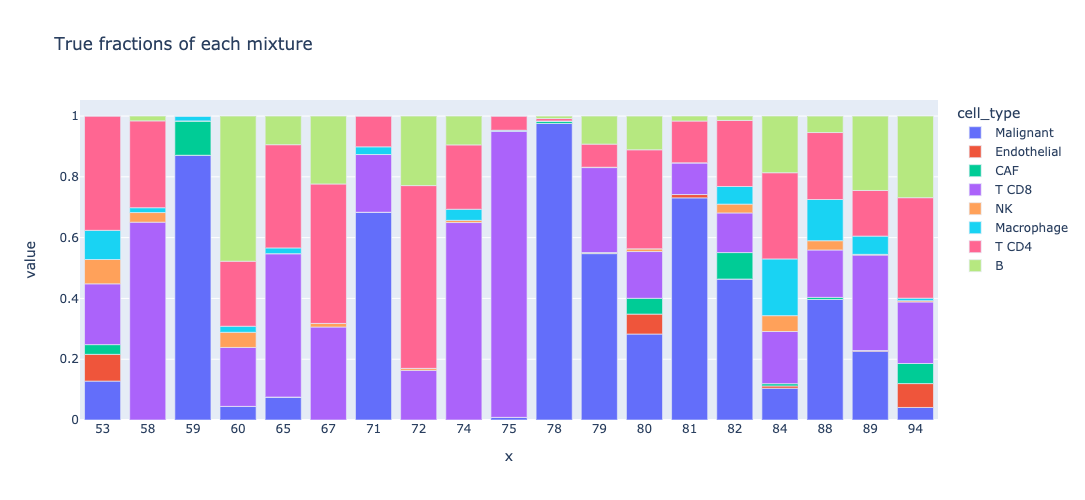

In [13]:
fig = px.bar(
    truth,
    x=truth.index.astype(str),
    y=truth.columns,
    title="True fractions of each mixture"
)

fig.show()